<ipython-input-6-2b20616a7e18>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Handle missing values (forward-fill)
<ipython-input-6-2b20616a7e18>:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


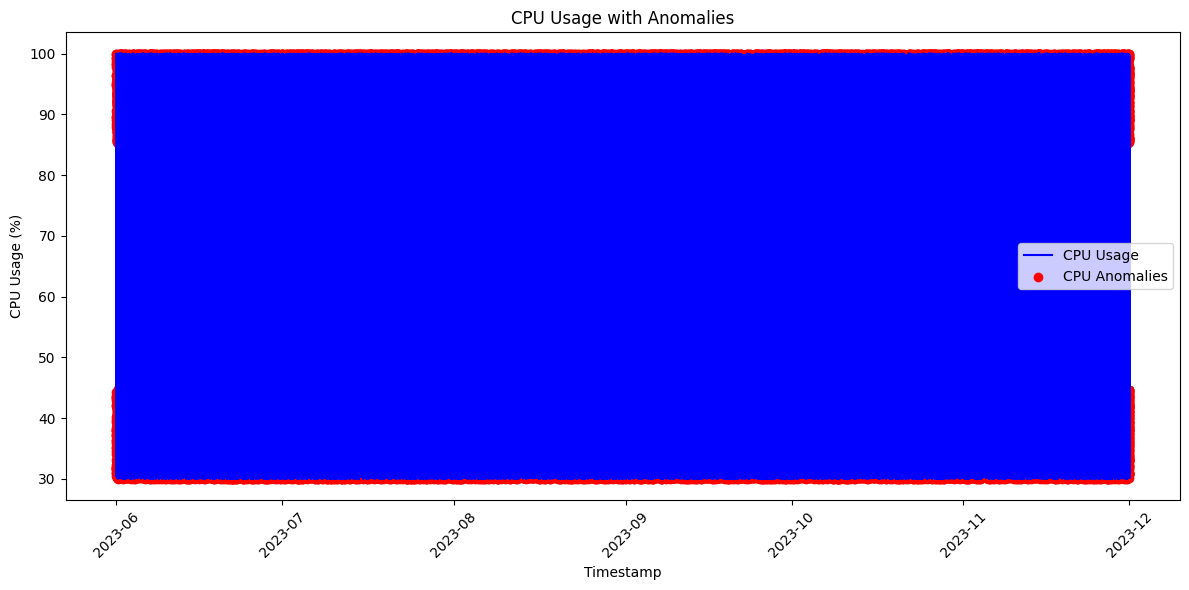

<ipython-input-6-2b20616a7e18>:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


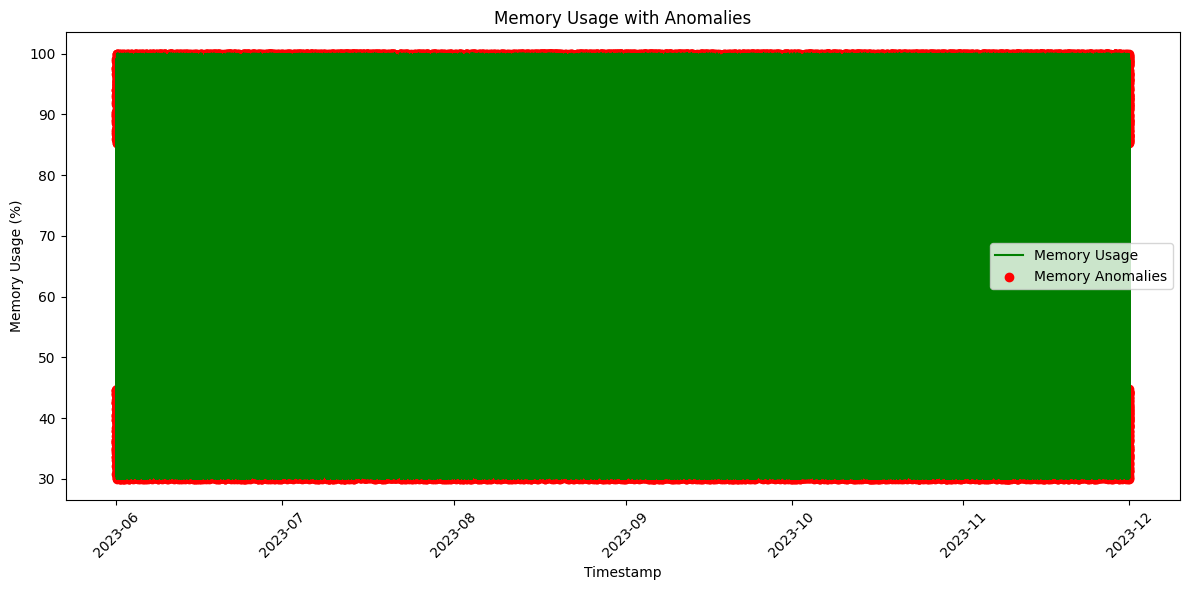

              precision    recall  f1-score   support

           0       0.63      0.97      0.76     69732
           1       0.85      0.20      0.33     50268

    accuracy                           0.65    120000
   macro avg       0.74      0.59      0.54    120000
weighted avg       0.72      0.65      0.58    120000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     39968
           1       0.00      0.00      0.00         0

    accuracy                           0.90     39968
   macro avg       0.50      0.45      0.47     39968
weighted avg       1.00      0.90      0.95     39968

New anomaly detected in order-srv-2 at 2023-12-01 00:00:00. CPU usage: 67.16%, Memory usage: 90.57%. What is the likely cause and solution?

The CPU utilization of the server is not affected by the anomaly.
. The CPU is used for the following tasks:
- CPU: CPU-1, CPU2, and CPU3. - CPU1: The server has a CPU of 1.0 GHz. This is a very high CPU. It is very fast. In order to run the program, the CPU must be at least 1 GHz higher than the target CPU, which is 1GHz higher. If the processor is at 1,000 MHz, then the system will run at the same speed as the computer. However, if the machine is 2,500 MHz or higher, it will not run. Therefore, a higher CPU will be used. For

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from scipy.stats import zscore
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Function to load data
def load_data(file_path='/content/synthetic_data (3).csv'):
    data = pd.read_csv(file_path)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data.sort_values(by='timestamp', inplace=True)
    return data

# Function to process data (handling missing values and generating Z-scores)
def process_data(data):
    data.fillna(method='ffill', inplace=True)
    data['cpu_zscore'] = zscore(data['cpu_usage'])
    data['memory_zscore'] = zscore(data['memory_usage'])

    # Define anomaly threshold
    threshold = 1
    data['cpu_anomaly'] = np.where(np.abs(data['cpu_zscore']) > threshold, 1, 0)
    data['memory_anomaly'] = np.where(np.abs(data['memory_zscore']) > threshold, 1, 0)

    return data

# Function for visualization
def visualize_data(data):
    # Plot CPU usage with anomalies
    cpu_anomalies = data[data['cpu_anomaly'] == 1]
    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], data['cpu_usage'], label='CPU Usage', color='blue')
    plt.scatter(cpu_anomalies['timestamp'], cpu_anomalies['cpu_usage'], color='red', label='CPU Anomalies')
    plt.title('CPU Usage with Anomalies')
    plt.xlabel('Timestamp')
    plt.ylabel('CPU Usage (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Memory usage with anomalies
    memory_anomalies = data[data['memory_anomaly'] == 1]
    plt.figure(figsize=(12, 6))
    plt.plot(data['timestamp'], data['memory_usage'], label='Memory Usage', color='green')
    plt.scatter(memory_anomalies['timestamp'], memory_anomalies['memory_usage'], color='red', label='Memory Anomalies')
    plt.title('Memory Usage with Anomalies')
    plt.xlabel('Timestamp')
    plt.ylabel('Memory Usage (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to train the model with test data
def train_model_with_test_data(data):
    X = data[['cpu_usage', 'memory_usage']]
    y = data['cpu_anomaly']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the Isolation Forest model
    model = IsolationForest(contamination=0.1, random_state=42)
    model.fit(X_train_scaled)

    # Predict anomalies on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred = np.where(y_pred == -1, 1, 0)

    print(classification_report(y_test, y_pred))

    return model, scaler

# Function to train the model with clean data
def train_model_with_clean_data(data):
    clean_data = data[(data['cpu_anomaly'] == 0) & (data['memory_anomaly'] == 0)]

    X_clean = clean_data[['cpu_usage', 'memory_usage']]
    y_clean = clean_data['cpu_anomaly']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the Isolation Forest model
    model = IsolationForest(contamination=0.1, random_state=42)
    model.fit(X_train_scaled)

    # Predict anomalies on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred = np.where(y_pred == -1, 1, 0)

    print(classification_report(y_test, y_pred))

    return model, scaler

# Function to build the GPT-2 model for generating responses based on anomalies
def build_model():
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id
    return model, tokenizer

# Function to generate a response using GPT-2
def generate_response(model, tokenizer, prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt', max_length=1024, truncation=True)
    outputs = model.generate(
        inputs,
        max_length=250,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        pad_token_id=tokenizer.pad_token_id
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Example usage of all functions

# Load the synthetic data
synthetic_data = load_data()

# Process the data
processed_data = process_data(synthetic_data)

# Visualize the data
visualize_data(processed_data)

# Train model with test data
model_test, scaler_test = train_model_with_test_data(processed_data)

# Train model with clean data
model_clean, scaler_clean = train_model_with_clean_data(processed_data)

# Build GPT-2 model
gpt_model, gpt_tokenizer = build_model()

# Example anomaly detection and GPT-2 response generation
recent_anomaly = processed_data[(processed_data['cpu_anomaly'] == 1) | (processed_data['memory_anomaly'] == 1)].iloc[-1]
prompt = f"New anomaly detected in {recent_anomaly['service_name']} at {recent_anomaly['timestamp']}. "
prompt += f"CPU usage: {recent_anomaly['cpu_usage']:.2f}%, Memory usage: {recent_anomaly['memory_usage']:.2f}%. "
prompt += "What is the likely cause and solution?"

response = generate_response(gpt_model, gpt_tokenizer, prompt)
print(response)
